In [93]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [95]:
df = pd.read_csv("../data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [96]:
print(df.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [97]:
df.shape

(21613, 21)

In [98]:
#Removing columns not needed
df = df.drop(['id', 'date'], axis=1)

In [99]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [100]:
#Creating house_age feature
df['house_age'] = 2015 - df['yr_built']

In [101]:
#Create is_renovated binary feature
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x>0 else 0)

In [102]:
#Drop original renovation data columns, now that we have is_renovated feature
df.drop(['yr_built', 'yr_renovated'], axis=1, inplace=True)

In [103]:
print(df.head())

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  zipcode      lat  \
0     0          3      7        1180              0    98178  47.5112   
1     0          3      7        2170            400    98125  47.7210   
2     0          3      6         770              0    98028  47.7379   
3     0          5      7        1050            910    98136  47.5208   
4     0          3      8        1680              0    98074  47.6168   

      long  sqft_living15  sqft_lot15  house_age  is_renovated  
0 -122.257     

In [106]:
#Removing extreme outliers
df = df[
    (df['bedrooms'] <= 10) &
    (df['bathrooms'] <= 6) &
    (df['price'] <= 3000000) &
    (df['sqft_living'] <= 10000)
]
df.shape

(21560, 19)

In [108]:
import seaborn as sns

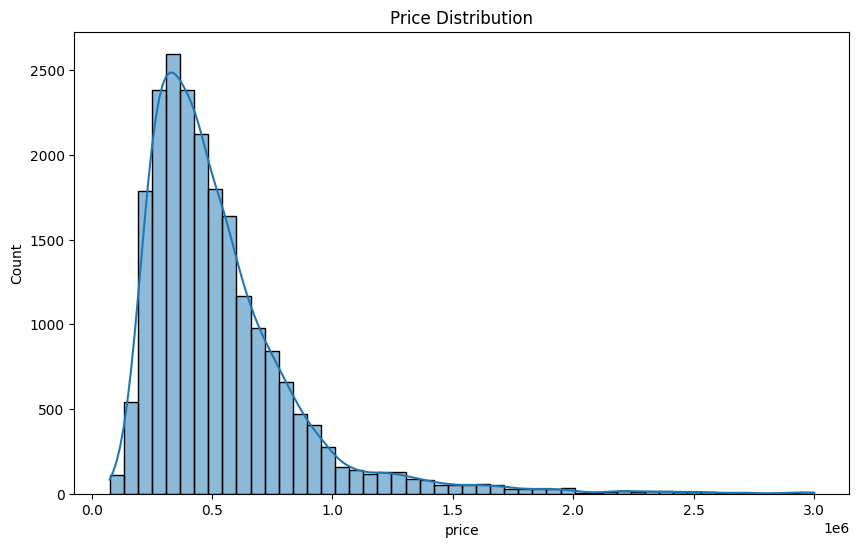

In [109]:
#EDA (Optional)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()


In [ ]:
# Creating feature matrix and target variable
#feature matrix x and target variable y, basically we remove price column because that's our (prediction) target

In [110]:
X = df.drop("price", axis=1)
y = df["price"]

In [111]:
# Identify categorical and numerical columns
categorical_features = ['zipcode']
numerical_features = [col for col in X.columns if col not in categorical_features]

In [ ]:
#Preprocessing & Model Pipeline
#One-hot encodes the 'zipcode' column.
#Leaves the rest of the features unchanged.
#Chains this preprocessing with a Random Forest regression model.
#Wraps both into a single pipeline so that fitting and predicting become simple and consistent:

In [112]:
# One-hot encode categorical data 'zipcode'
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

In [113]:
# Use Random Forest Regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [114]:
#Train-Test Split & Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['zipcode'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
#train_test_split splits the dataset into training and test sets
#x,y are feature and target variables
#test_size=0.2 : 20% of the data will be used for testing, 80% for training
#random_state=42 : for reproducibility of results

In [ ]:
#model.fit(): This is the main function that trains the model using training features x_train and training target y_train

In [115]:
#Evaluate model
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: ${rmse:,.0f}")
print(f"R² Score: {r2:.4f}")

RMSE: $125,251
R² Score: 0.8664


In [ ]:
#The model makes predictions which are stored in y_pred
#RMSE is calculated as the square root of the mean of the squared differences between y_true and y_pred
#r2_score is the coefficient of determination, which is 1 minus the ratio of the sum of the squared residuals, its between 0 to 1(higher is better)

In [116]:
#Save model
joblib.dump(model, "real_estate_price_model.pkl")
print("Model saved to real_estate_price_model.pkl")

Model saved to real_estate_price_model.pkl
